<a href="https://colab.research.google.com/github/john-jehiel/cards-image-classification/blob/main/cards_image_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = r'C:\Users\jnjeh\Downloads\kaggle (1).json'

In [ ]:
!kaggle datasets download gpiosenka/cards-image-datasetclassification/

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification/versions/
License(s): CC0-1.0
100% 385M/385M [00:19<00:00, 20.1MB/s]
100% 385M/385M [00:19<00:00, 20.9MB/s]


In [ ]:
import zipfile
import os

# Specify the path to the downloaded dataset
zip_file_path = "/content/cards-image-datasetclassification.zip"
extract_to = "cards-image-datasetclassification"

# Extract the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Dataset extracted to {extract_to}")


Dataset extracted to cards-image-datasetclassification


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
# Defining directories
train_dir = "/content/cards-image-datasetclassification/train/"
valid_dir = "/content/cards-image-datasetclassification/valid/"
test_dir = "/content/cards-image-datasetclassification/test/"

In [ ]:
# Defining parameters
batch_size = 32
image_size = (224, 224)
num_classes = 53

In [ ]:
# Data augmentation and preprocessing
datagen_train = ImageDataGenerator(rescale=1.0/255.0)

datagen_test = ImageDataGenerator(rescale=1.0/255.0)

datagen_valid = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_generator = datagen_train.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = datagen_valid.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen_valid.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64,
                         kernel_size=3,
                         activation='relu',
                         input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(filters=64,
                         activation='relu',
                         kernel_size=3),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(filters=64,
                         activation='relu',
                         kernel_size=3),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(num_classes, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)

In [ ]:
epochs = 20
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=epochs,
    callbacks=[early_stopping]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


239/239 ━━━━━━━━━━━━━━━━━━━━ 24s 83ms/step - accuracy: 0.1492 - loss: 3.3494 - val_accuracy: 0.5585 - val_loss: 1.4734
Epoch 2/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 37s 72ms/step - accuracy: 0.5677 - loss: 1.5943 - val_accuracy: 0.7472 - val_loss: 1.0118
Epoch 3/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.7739 - loss: 0.8062 - val_accuracy: 0.7623 - val_loss: 0.9042
Epoch 4/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.8962 - loss: 0.3847 - val_accuracy: 0.7774 - val_loss: 1.0487
Epoch 5/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.9437 - loss: 0.2027 - val_accuracy: 0.8000 - val_loss: 1.0767
Epoch 6/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.9708 - loss: 0.1211 - val_accuracy: 0.8000 - val_loss: 1.3612


In [ ]:
print("\Evaluating on training data:")
results = model.evaluate(train_generator)
print(f"Training Loss: {results[0]:.4f}")
print(f"training Accuracy: {results[1]:.4f}")

\Evaluating on training data:
239/239 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.9815 - loss: 0.0937
Training Loss: 0.0916
training Accuracy: 0.9823


In [ ]:
print("\nEvaluating on testing data:")
results = model.evaluate(test_generator)
print(results)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")


Evaluating on testing data:
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7960 - loss: 1.3872
[1.7399932146072388, 0.7660377621650696]
Test Loss: 1.7400
Test Accuracy: 0.7660


In [ ]:
# Predictions and metrics
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step

Classification Report:
                   precision    recall  f1-score   support

     ace of clubs       1.00      0.80      0.89         5
  ace of diamonds       1.00      0.80      0.89         5
    ace of hearts       1.00      1.00      1.00         5
    ace of spades       0.83      1.00      0.91         5
   eight of clubs       0.50      1.00      0.67         5
eight of diamonds       0.62      1.00      0.77         5
  eight of hearts       1.00      1.00      1.00         5
  eight of spades       0.67      0.40      0.50         5
    five of clubs       1.00      0.60      0.75         5
 five of diamonds       0.75      0.60      0.67         5
   five of hearts       1.00      0.80      0.89         5
   five of spades       0.71      1.00      0.83         5
    four of clubs       0.67      0.80      0.73         5
 four of diamonds       0.71      1.00      0.83         5
   four of hearts       1.00      1.00      1.00    

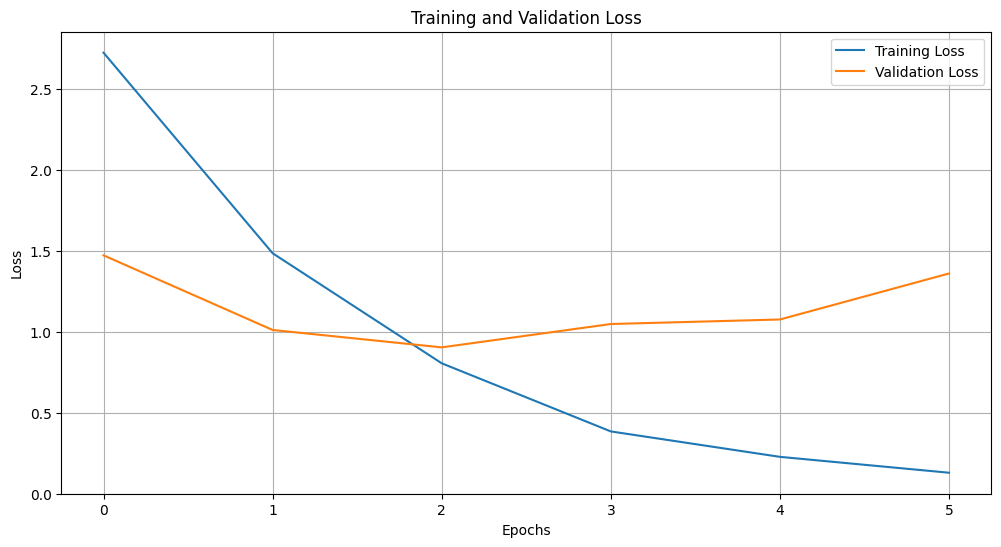

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

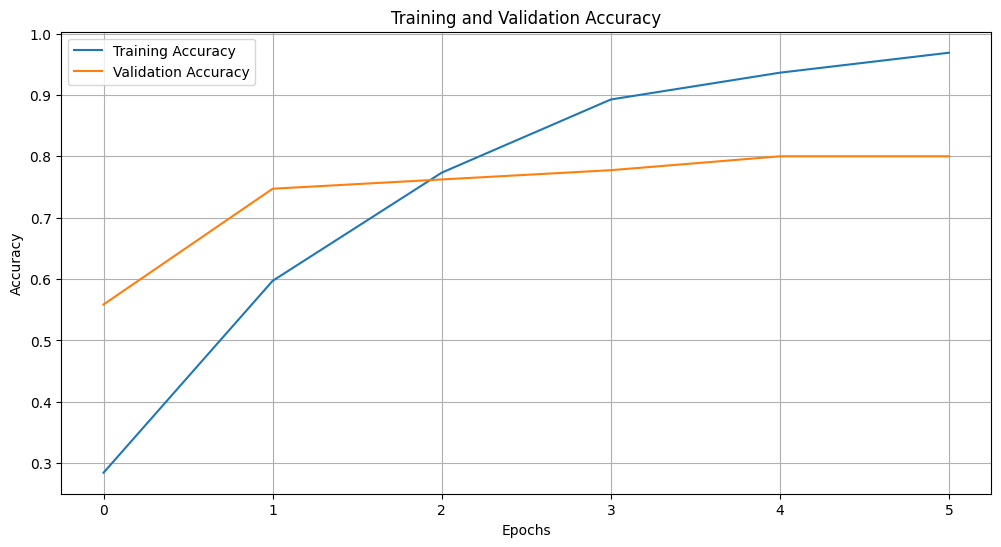

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.save("cnn_v1.h5")
print("Model saved")

Model saved


In [ ]:
loaded_model = load_model("cnn_v1.h5")
print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
# Recompile the model
loaded_model.compile(optimizer='adam',  # Use the same optimizer as before
                     loss='categorical_crossentropy',  # Use the same loss function
                     metrics=['accuracy'])

In [ ]:
# Predictions and metrics
predictions = loaded_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step

Classification Report:
                   precision    recall  f1-score   support

     ace of clubs       1.00      0.80      0.89         5
  ace of diamonds       1.00      0.80      0.89         5
    ace of hearts       1.00      1.00      1.00         5
    ace of spades       0.83      1.00      0.91         5
   eight of clubs       0.50      1.00      0.67         5
eight of diamonds       0.62      1.00      0.77         5
  eight of hearts       1.00      1.00      1.00         5
  eight of spades       0.67      0.40      0.50         5
    five of clubs       1.00      0.60      0.75         5
 five of diamonds       0.75      0.60      0.67         5
   five of hearts       1.00      0.80      0.89         5
   five of spades       0.71      1.00      0.83         5
    four of clubs       0.67      0.80      0.73         5
 four of diamonds       0.71      1.00      0.83         5
   four of hearts       1.00      1.00      1.00    

In [ ]:
def predict_single_image(image_path):
    # Load and preprocess the image
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image) / 255.0  # Normalize the image
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

    # Make a prediction
    prediction = loaded_model.predict(image_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_labels[predicted_class]

    # Display the predicted class
    print(f"Predicted Class: {predicted_label}")

    # Display the image
    plt.imshow(image)
    plt.title(f"Predicted Class: {predicted_label}")
    plt.axis('off')  # Hide axes
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Class: ace of hearts


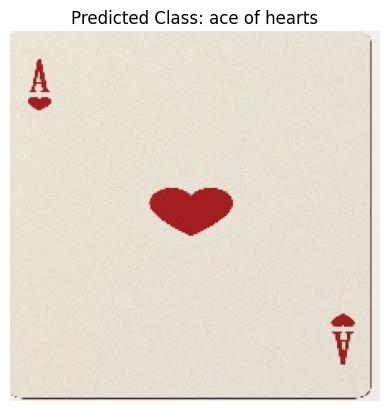

In [ ]:
predict_single_image("/content/cards-image-datasetclassification/test/ace of hearts/2.jpg")